### Descripcion del proyecto 

Proyecto

Descripción del proyecto
La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

In [92]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Paso 1. Descargar los datos

In [93]:
df = pd.read_csv('gym_churn_us.csv')
print(df.info())
print(df.shape)
print(f'La cantidad de datos duplicados es: {df.duplicated().sum()}')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0

Por el momento los datos presentan una consistencia clara, no se encuentra datos vacios, tampoco se encuentran datos duplicados y el tipo de datos coincide con sus datos respectivos, por lo tanto no se considera necesario realizar un procesamiento de los datos ya que se encuentran en orden para proceder con su analisis.

### Paso 2. Llevar a cabo el análisis exploratorio de datos (EDA)

In [94]:
df.describe()

gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.000000    27.000000   
50%           1.000000      0.000000    29.000000   
75%           6.000000      1.000000    31.000000   
max          12.000000      1.000000    41.000000   

       Avg_additional_charges_total  Month_to_end_contract     Lifetime  \
count                   4000.000000            4000.000000  4000.000000   
mean                     146.943728               4.322750     3.724750   
std                       96.355602               4.191297     3.749267   
min                        0.148205               1.000000     0.000000   
25%                       68.868830               1.000000     1.000000   
50%                      136.220159               1.000000     3.000000   
75%                      210.949625               6.000000     5.000000   
max                      552.590740              12.000000    31.000000   

       Avg_class_frequency_total  Avg_class_frequency_current_month  \
count                4000.000000                        4000.000000   
mean                    1.879020                           1.767052   
std                     0.972245                           1.052906   
min                     0.000000                           0.000000   
25%                     1.180875                           0.963003   
50%                     1.832768                           1.719574   
75%                     2.536078                           2.510336   
max                     6.023668                           6.146783   

             Churn  
count  4000.000000  
mean      0.265250  
std       0.441521  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [95]:
churn_type = df. groupby('Churn').mean()
churn_type.head()

gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.027882  
1                               1.044546

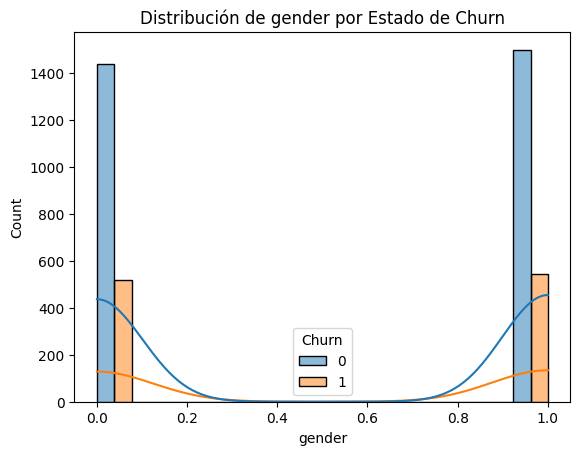

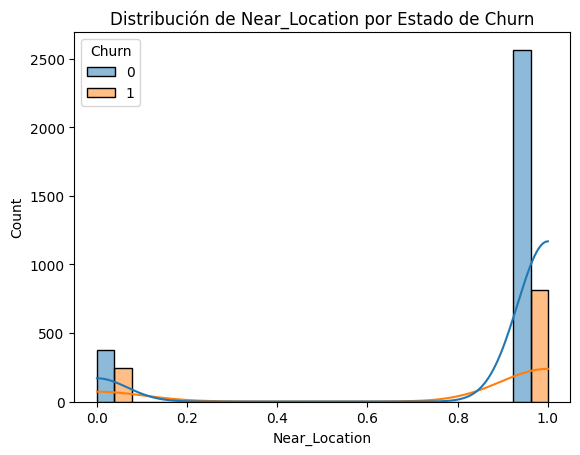

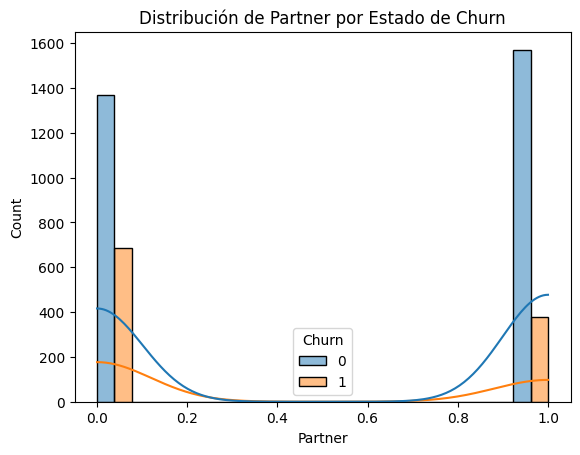

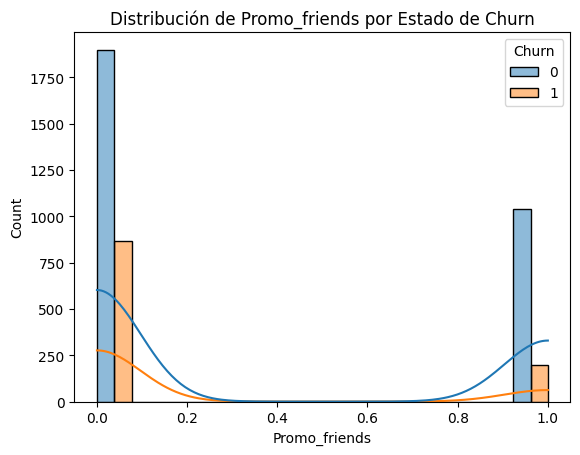

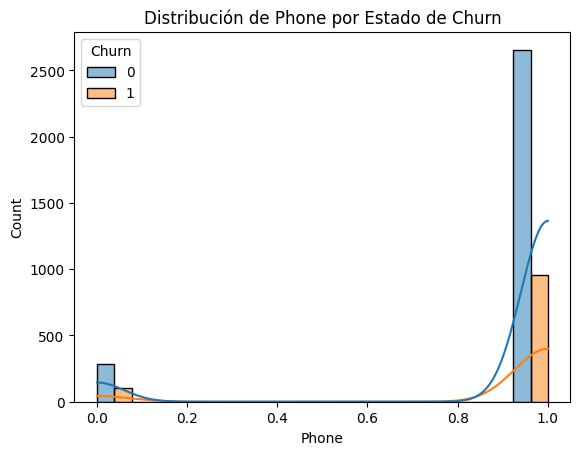

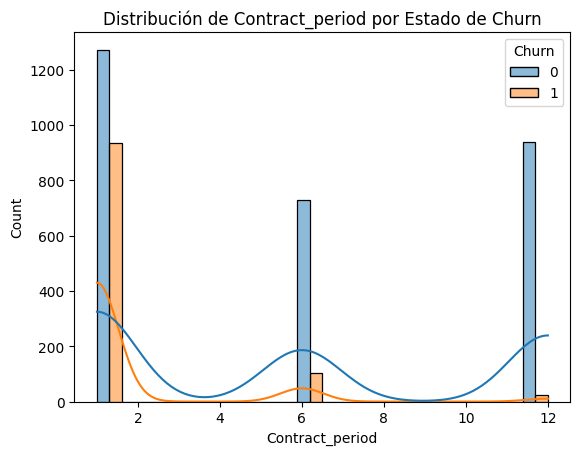

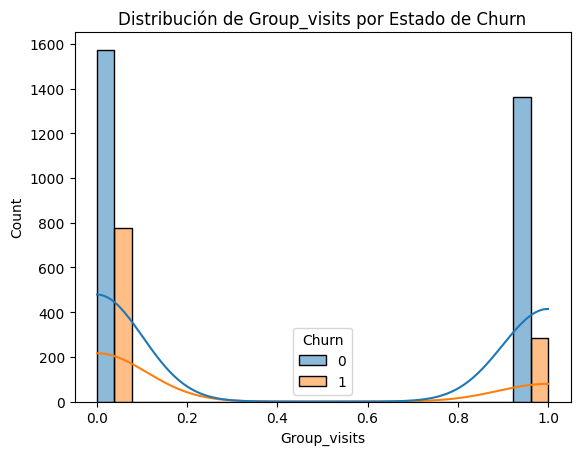

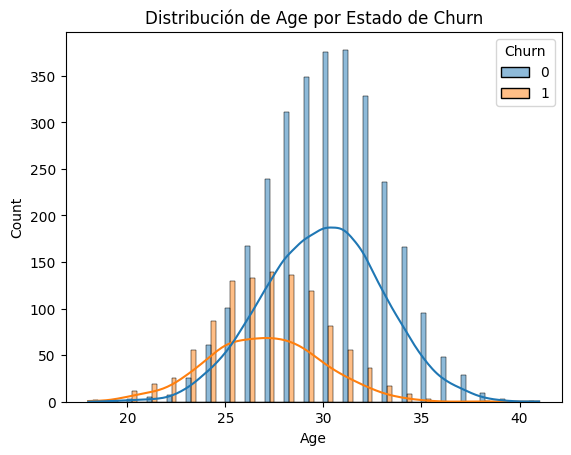

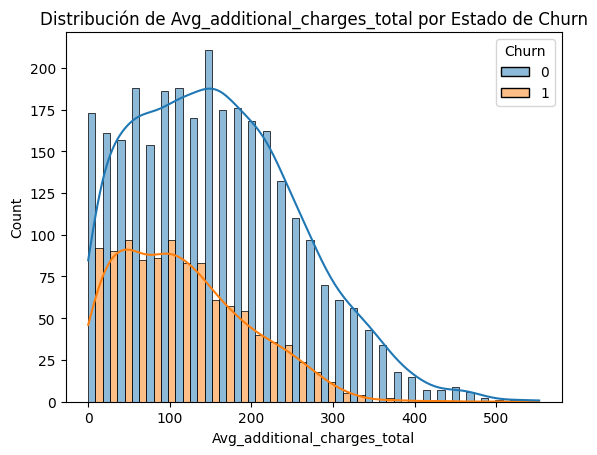

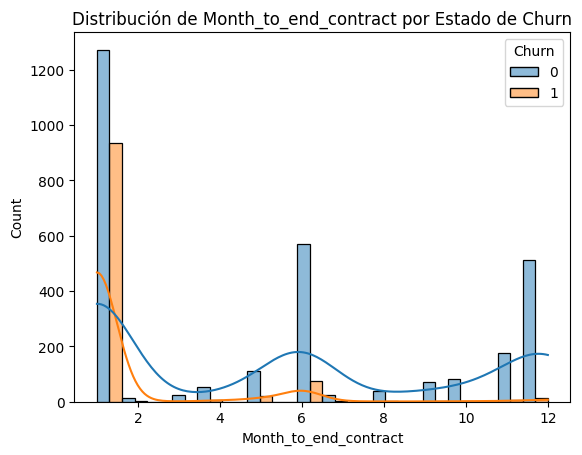

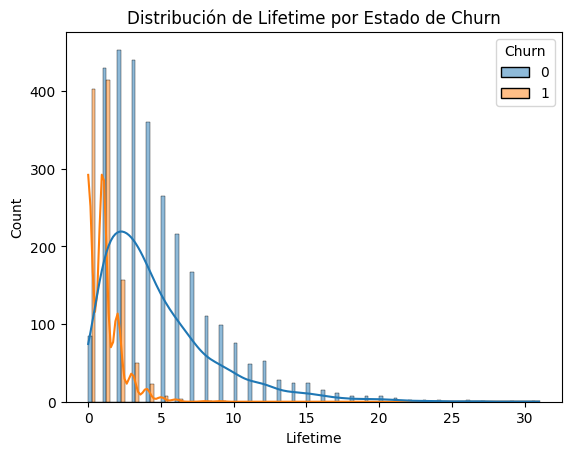

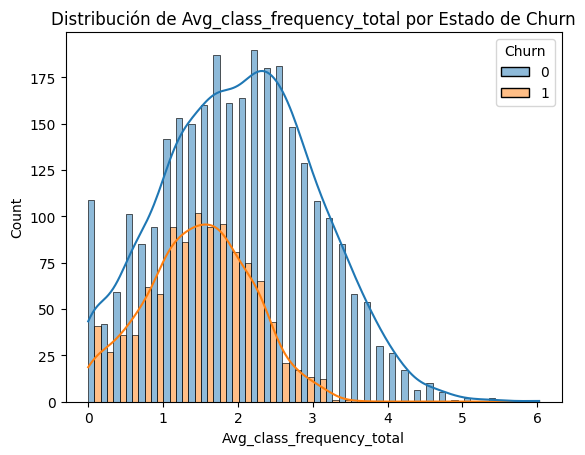

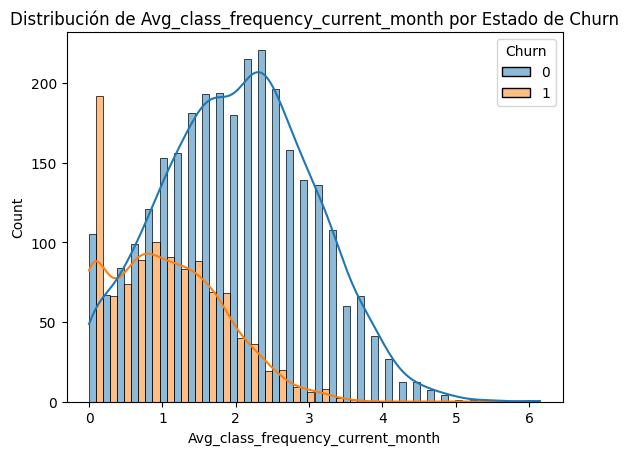

In [96]:
for col in df.drop('Churn', axis= 1).columns:
    sns.histplot(data= df, x= col, hue='Churn', multiple= 'dodge', kde= True)
    plt.title(f'Distribución de {col} por Estado de Churn')
    plt.xlabel(col)
    plt.show()  

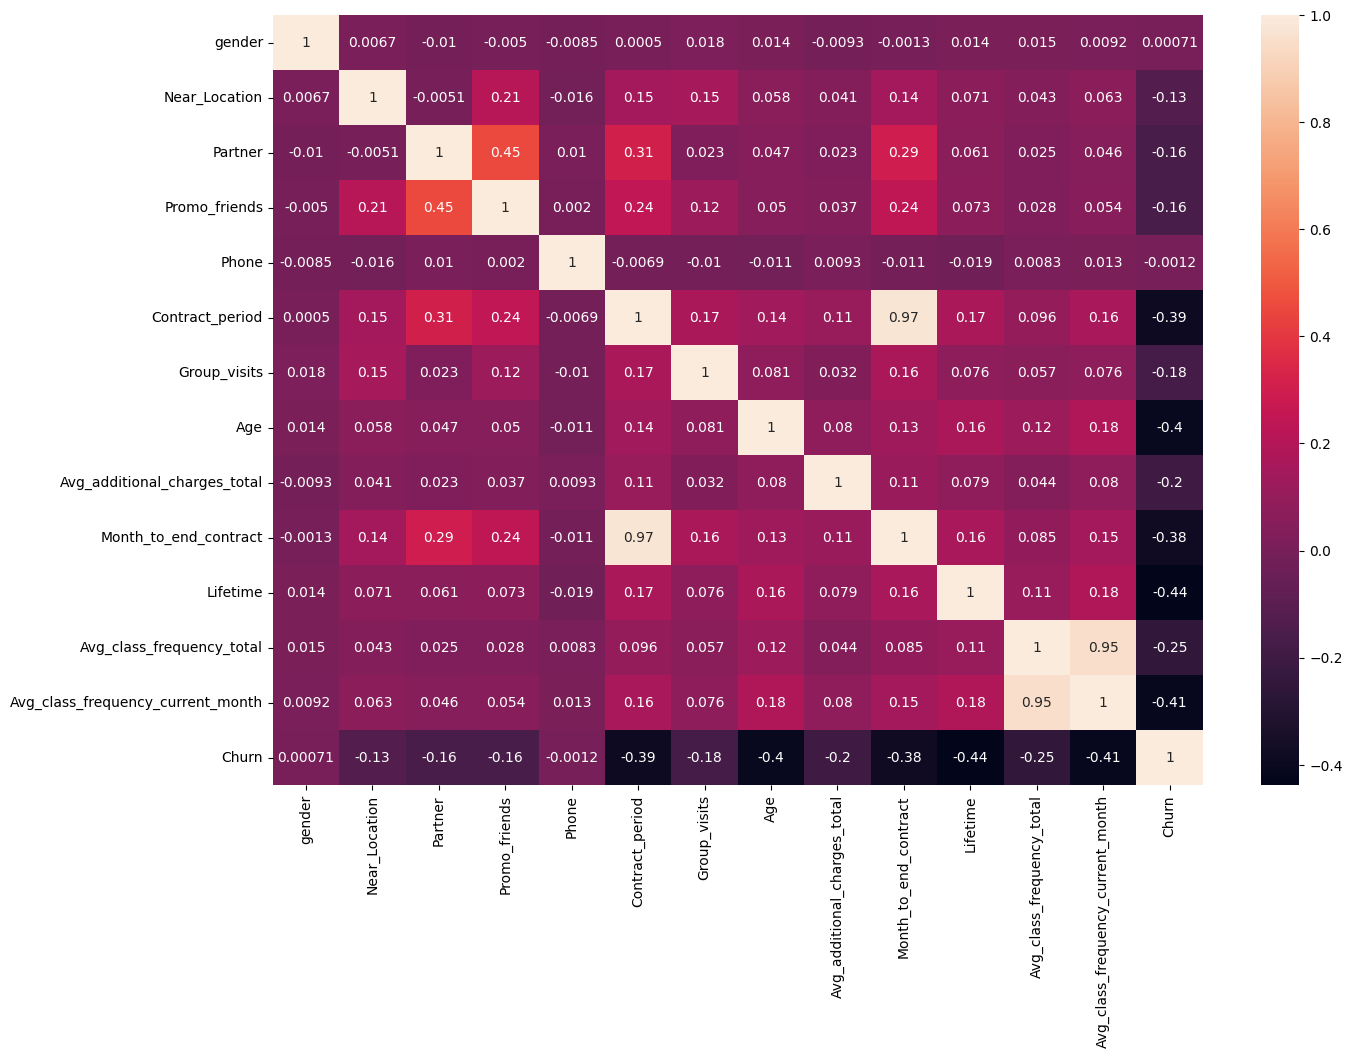

In [97]:
corr= df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot= True)
plt.show()

Como se puede observar en el análisis exploratorio y en la matriz de correlación, la tasa de deserción presenta correlaciones negativas con variables como la frecuencia de asistencia, los periodos de contrato y la antigüedad de los usuarios en el gimnasio.

### 3. Construir un modelo para predecir la cancelación de usuarios

In [98]:
X = df.drop('Churn', axis= 1)
y = df['Churn']

# Dividir el conjunto en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [99]:
# Entrena el scaler y transforma la matriz para el conjunto de entrenamiento 
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)

# aplica la estandarización a la matriz de característica para el test de prueba
X_test_st = scaler.transform(X_test)

# Modelo de Regresion Logistica 
lr_model = LogisticRegression(random_state=0)

# Entrenar el modelo
lr_model.fit(X_train_st, y_train)

# Utiliza el modelo entrenado para hacer predicciones
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
lr_predictions = lr_model.predict(X_test_st)


# Modelo de Bosque Aleatorio
rf_model= RandomForestClassifier(n_estimators=100, random_state=0)

# Entrenar el modelo
rf_model.fit(X_train_st,y_train)

# Utiliza el modelo entrenado para hacer predicciones
rf_probabilities= rf_model.predict_proba(X_test_st)[:,1]
rf_predictions= rf_model.predict(X_test_st)


In [100]:
def print_all_metrics(y_true, y_pred,y_proba, title= 'Metricas de cllasificacion'):
    print(title)
    print('\tAccuracy:{:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision:{:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall:{:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1:{:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC:{:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [101]:
print_all_metrics(y_test,lr_predictions,lr_probabilities,title='Metricas de regresion logistica')
print_all_metrics(y_test,rf_predictions,rf_probabilities,title='Metricas de bosque aleatorio')

Metricas de regresion logistica
	Accuracy:0.92
	Precision:0.85
	Recall:0.83
	F1:0.84
	ROC_AUC:0.97
Metricas de bosque aleatorio
	Accuracy:0.92
	Precision:0.84
	Recall:0.81
	F1:0.83
	ROC_AUC:0.97


Tras analizar los dos modelos utilizados (Regresión Logística y Bosque Aleatorio), se observa que ambos presentan un rendimiento muy similar. No obstante, el modelo de Regresión Logística muestra un ligero advantage en métricas clave como precisión y recall, por lo que se recomienda su implementación.

### Paso 4. Crear clústeres de usuarios/as

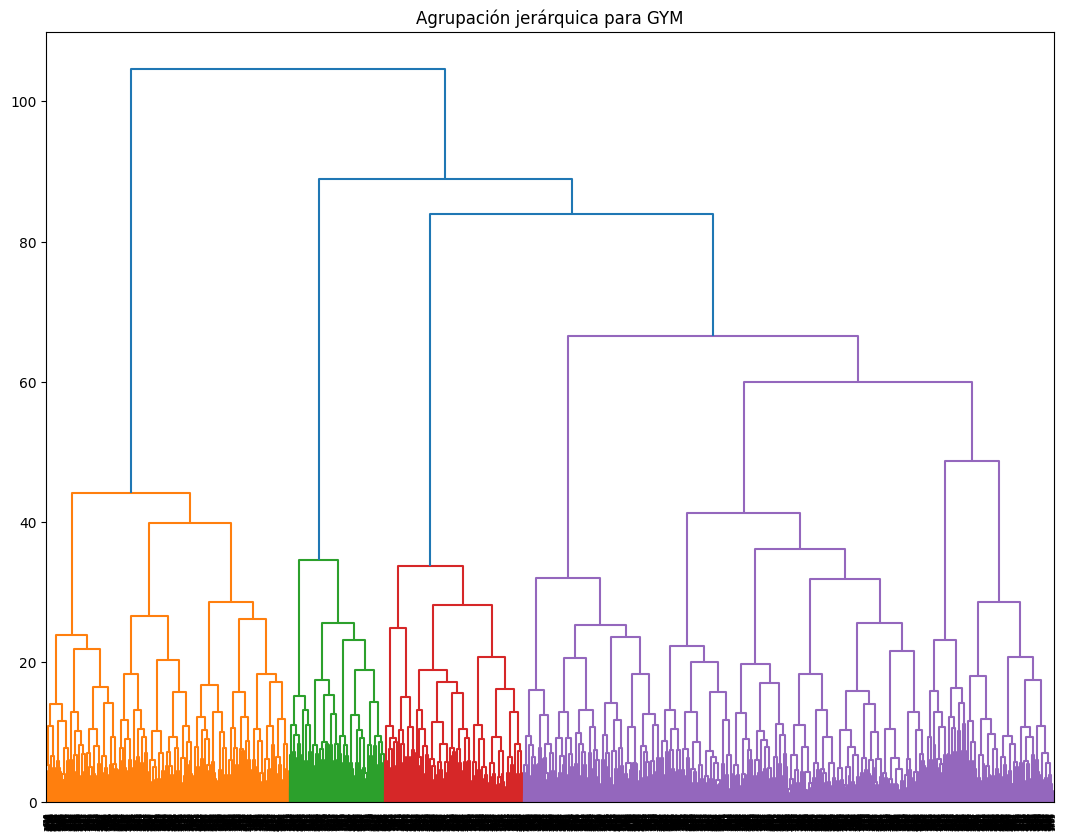

In [102]:
# Dendograma

sc= StandardScaler()
X_sc= sc.fit_transform(df.drop('Churn',axis=1))

linked= linkage(X_sc, method='ward')

plt.figure(figsize=(13,10))
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para GYM')
plt.show()

Del dendograma podemos estimar o destacar 6 clusteres principales basandonos en el corte alrededor del 40.

In [103]:
# define el modelo k_means con 5 clústeres
km= KMeans(n_clusters=5, random_state=0)

labels= km.fit_predict(X_sc)

df['cluster_km']= labels

df.groupby('cluster_km').mean()

gender  Near_Location   Partner  Promo_friends     Phone  \
cluster_km                                                               
0           0.486819       1.000000  0.243409       0.007030  0.899824   
1           0.592493       0.970509  0.288204       0.123324  0.898123   
2           0.499469       0.943677  0.740701       0.489904  0.900106   
3           0.483360       1.000000  0.798732       1.000000  0.911252   
4           0.496324       0.000000  0.466912       0.077206  0.915441   

            Contract_period  Group_visits        Age  \
cluster_km                                             
0                  1.978910      0.326889  28.239016   
1                  2.898123      0.482574  30.339142   
2                 11.866100      0.551541  29.905420   
3                  3.079239      0.445325  29.052298   
4                  2.209559      0.215074  28.483456   

            Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster_km                                                                  
0                             130.877033               1.896309  2.477153   
1                             164.193829               2.654155  5.219839   
2                             165.146492              10.852285  4.737513   
3                             139.858265               2.873217  3.510301   
4                             133.630215               2.073529  2.781250   

            Avg_class_frequency_total  Avg_class_frequency_current_month  \
cluster_km                                                                 
0                            1.318003                           1.083831   
1                            2.937411                           2.944131   
2                            1.989423                           1.980764   
3                            1.665722                           1.547717   
4                            1.657657                           1.466870   

               Churn  
cluster_km            
0           0.513181  
1           0.054960  
2           0.022317  
3           0.269414  
4           0.450368

Se pueden extraer las siguientes observaciones:

En cuanto a la localización, el cluster 4 no cuenta con ningún cliente en sus inmediaciones.

Los clientes del cluster 3 trabajan predominantemente en empresas asociadas al gimnasio.

Los clientes de los clusters 0 y 3 poseen las membresías de mayor duración o valor.

Los clientes del cluster 1 son los que han tomado menos clases en el mes actual y, a su vez, presentan la mayor tasa de deserción.

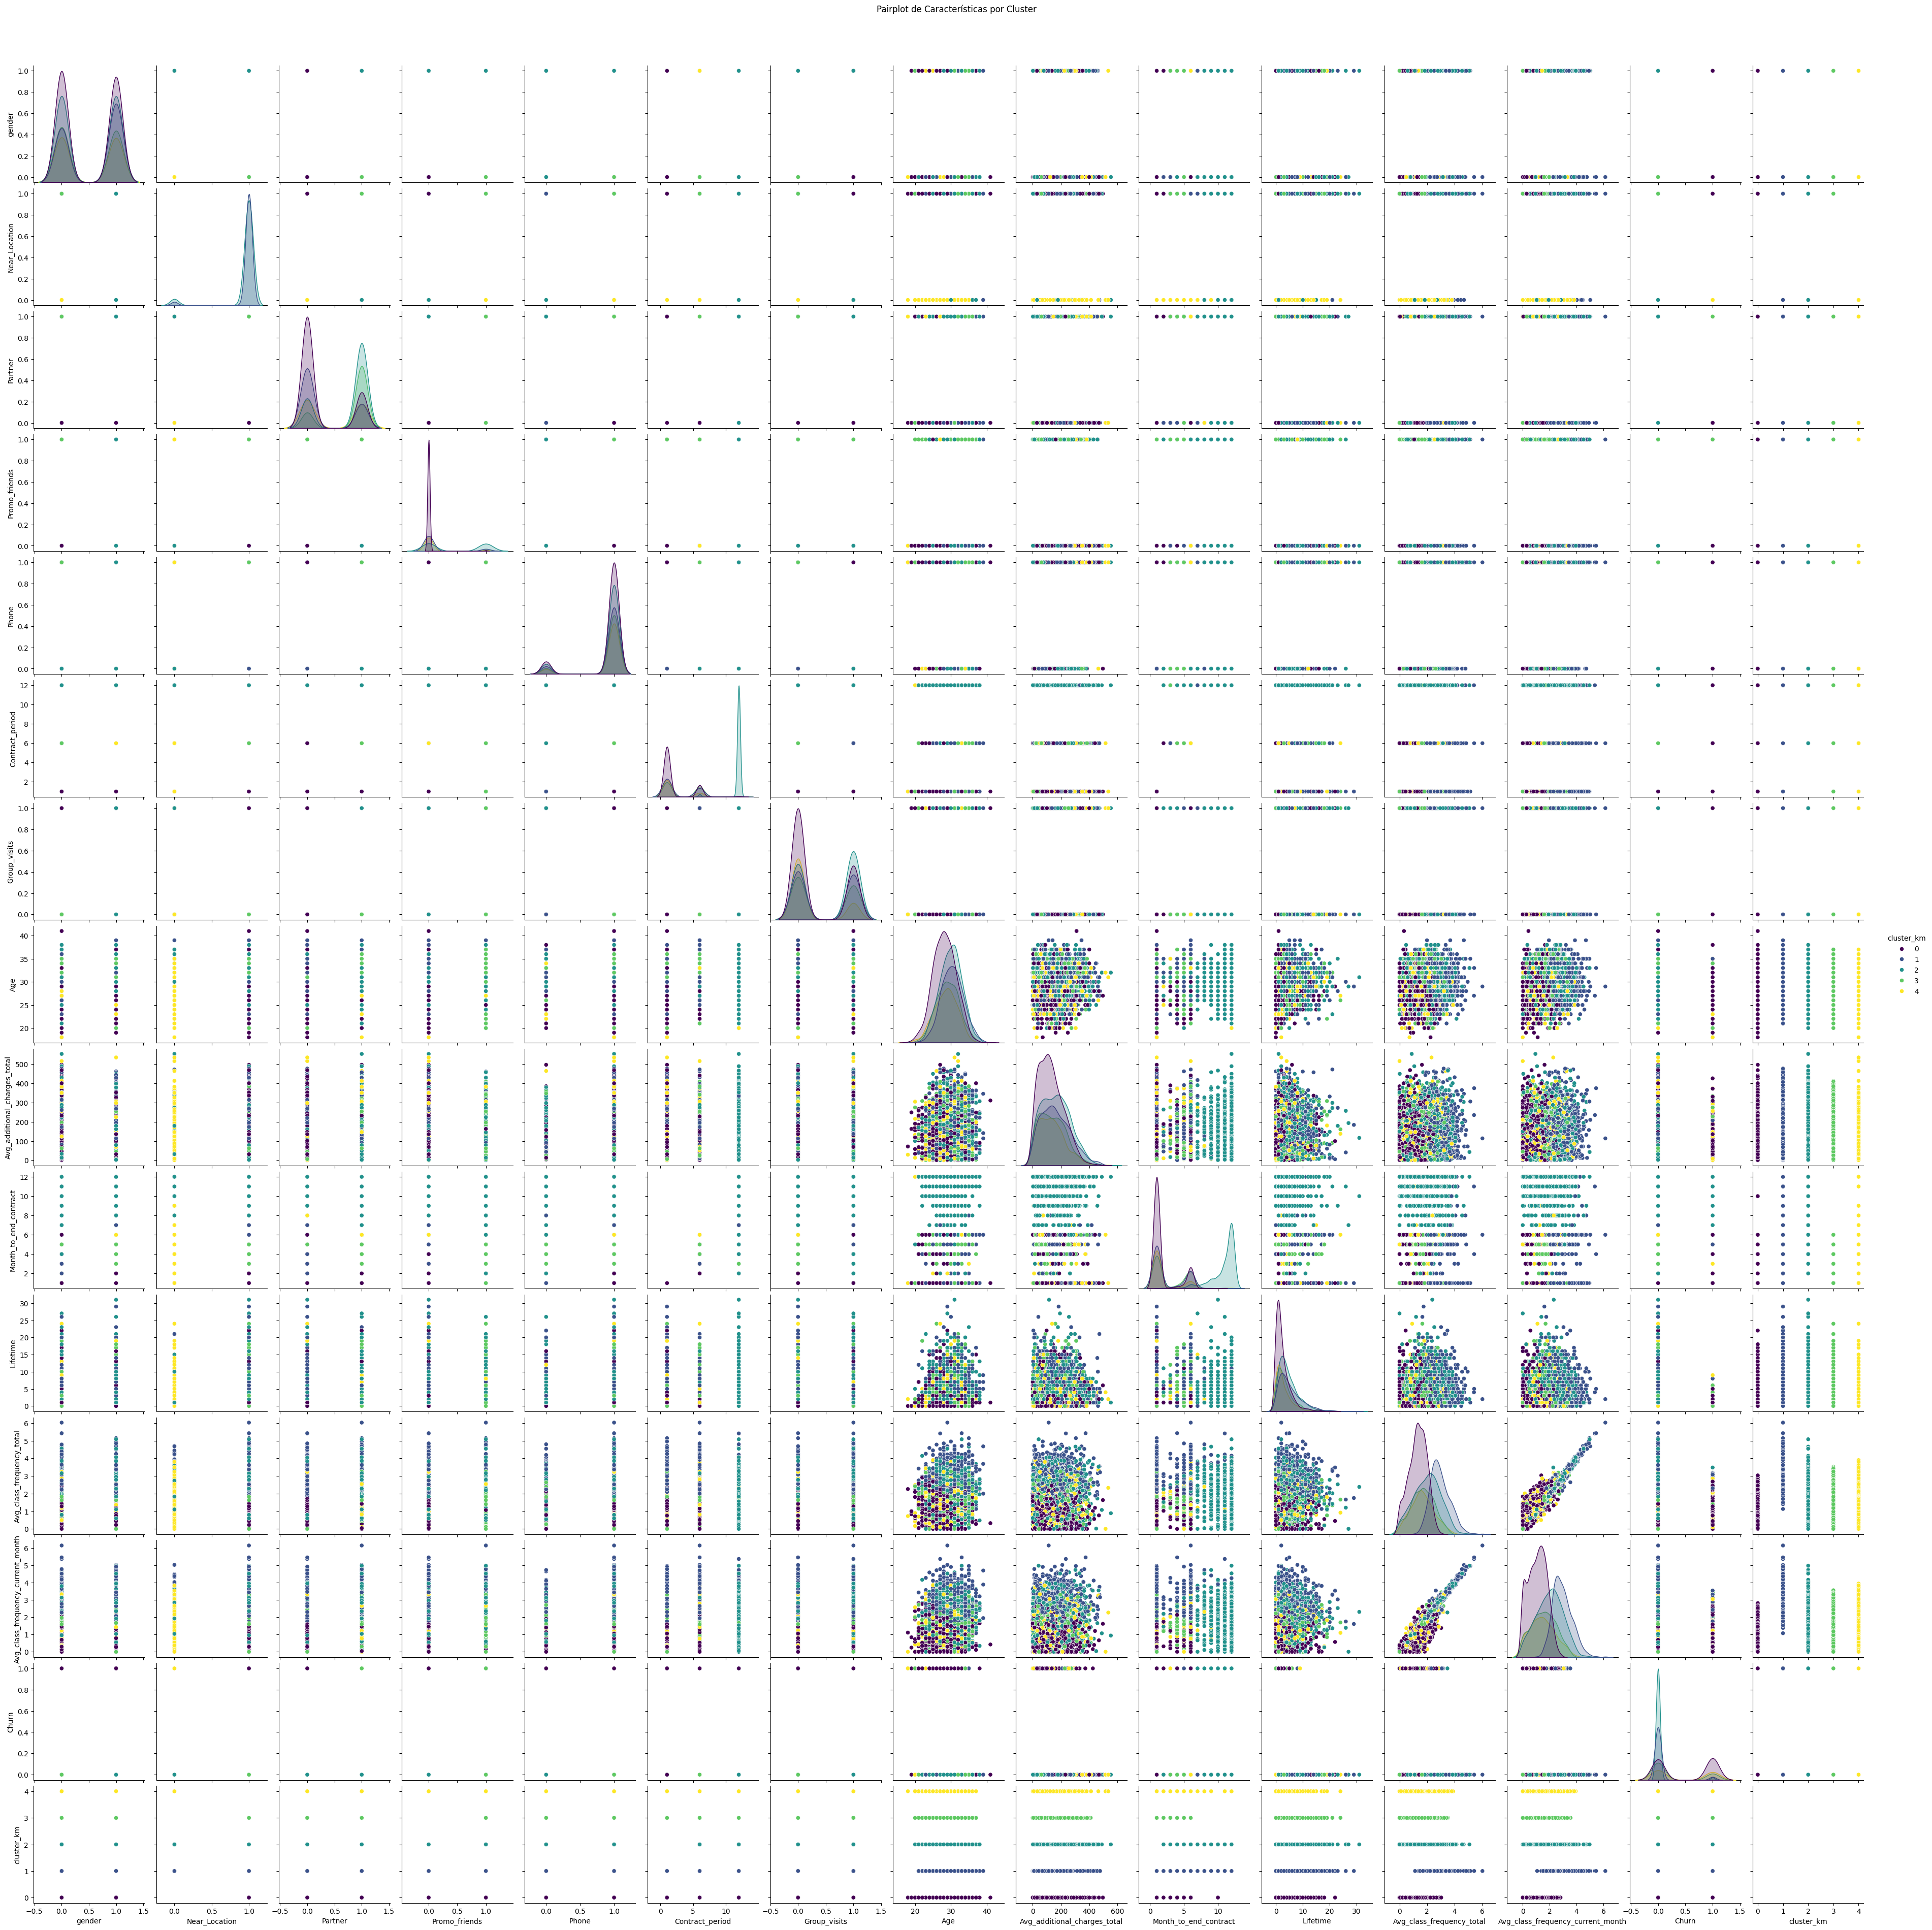

In [104]:
def plot_pairplot_clusters(df, features):
    sns.pairplot(df, vars=features, hue='cluster_km', palette='viridis', diag_kind='kde')
    plt.suptitle('Pairplot de Características por Cluster', y=1.02)
    plt.show()


feature_names = []
for col in df.columns:
    feature_names.append(col)

feature_names
plot_pairplot_clusters(df, feature_names)

In [105]:
# Funcion para graficar caracterizticas pareadas

def show_cluster_on_plot(df, x_name,y_name,cluster_name):
    plt.figure(figsize=(5,5))
    sns.scatterplot(data= df, x= x_name,y= y_name, hue=cluster_name, palette='Paired')
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

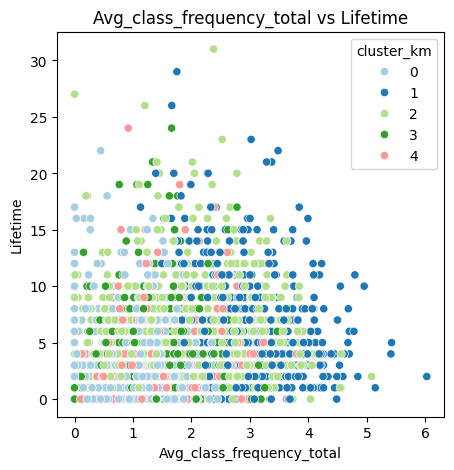

In [106]:
show_cluster_on_plot(df,'Avg_class_frequency_total','Lifetime','cluster_km')

In [116]:
churn_by_cluster= df.groupby('cluster_km')['Churn'].mean().reset_index()
churn_by_cluster

cluster_km     Churn
0           0  0.513181
1           1  0.054960
2           2  0.022317
3           3  0.269414
4           4  0.450368

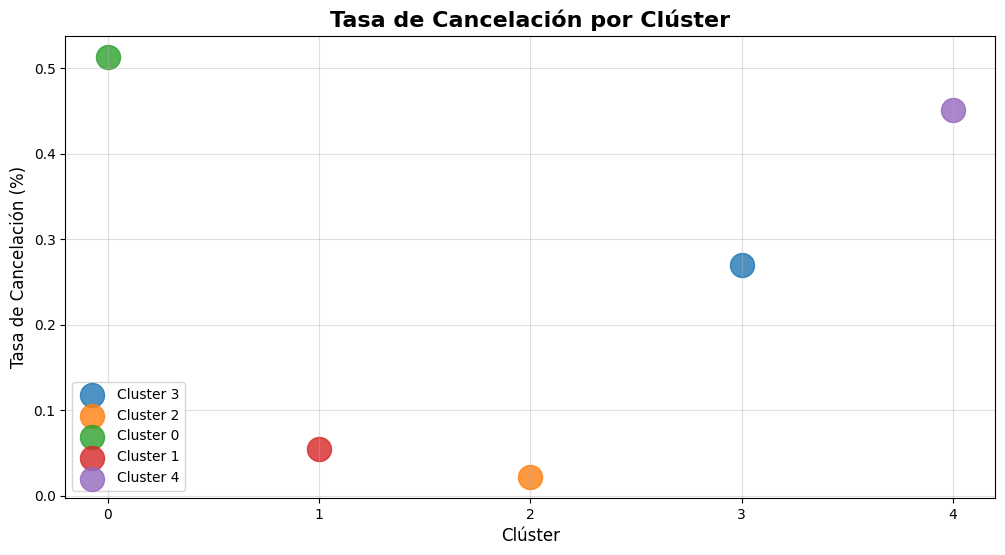

In [117]:
#Visualizar tasa de cancelación
churn_rate_by_cluster= df.groupby('cluster_km')['Churn'].mean()

plt.figure(figsize=(12, 6))

for cluster in df['cluster_km'].unique():
    cluster_data = df[df['cluster_km'] == cluster]
    plt.scatter(cluster, churn_rate_by_cluster[cluster], 
                s=300, alpha=0.8,
                label=f'Cluster {cluster}')

plt.title('Tasa de Cancelación por Clúster', fontsize=16, fontweight='bold')
plt.xlabel('Clúster', fontsize=12)
plt.ylabel('Tasa de Cancelación (%)', fontsize=12)
plt.xticks(range(5))
plt.grid(alpha=0.4)
plt.legend()
plt.show()

El análisis de clusters revela que los grupos con mayor propensión al abandono son el cluster 0 (51%) y el cluster 4 (45%). Las características comunes que explican este comportamiento son:

Una baja frecuencia de visita al gimnasio.

Contratos que están próximos a vencer.

Por otro lado, los clusters con mayor fidelidad son el 2 y el 1. Estos grupos se distinguen por:

Su alta frecuencia de asistencia.

Realizar un mayor gasto en servicios adicionales del gimnasio.

### 5. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes

Para finalizar, se proponen las siguientes estrategias clave para mejorar la retención de clientes:

Programas de fidelización para renovaciones: Implementar un sistema de seguimiento y acompañamiento personalizado para clientes cuyas membresías estén próximas a vencer, ofreciendo renovaciones anticipadas con beneficios exclusivos.

Incentivos para aumentar la frecuencia de visita: Desarrollar campañas que motiven la asistencia constante, como programas de recompensas por número de visitas o desafíos mensuales. Una mayor engagement con el servicio reduce significativamente la probabilidad de abandono.

Ventajas por compromiso a largo plazo: Estructurar y promocionar descuentos atractivos o servicios premium incluidos para los clientes que opten por membresías de mayor duración, asegurando así su permanencia.